In [1]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model

# Modeli yükle
model = load_model("vgg_model.keras")

# .npy dosyasını yükle
X = np.load("TCGA-DH-A7UT_25298a64-8ec7-4b0d-a391-2526e61c0fb4.dcm.npy")  # (n, 240, 240)

# Tahminleri burada tutacağız
batch_size = 2000
predictions = []

# Veriyi 1000'li batch'lere böl
for start in range(0, len(X), batch_size):
    end = min(start + batch_size, len(X))  # Son batch kontrolü
    X_batch = X[start:end]

    # Batch'i işleme (resize, RGB, normalize)
    X_resized = np.array([cv2.resize(img, (224, 224)) for img in X_batch])
    X_rgb = np.stack([X_resized]*3, axis=-1)  # (batch_size, 224, 224, 3)
    X_processed = X_rgb.astype(np.float32) / 255.0  # Normalize

    # Tahmin yap
    batch_preds = model.predict(X_processed, batch_size=32, verbose=1)
    
    # Sınıf tahminlerini çıkar
    class_preds_batch = np.argmax(batch_preds, axis=1)
    
    
    # Batch sonuçlarını toplama
    predictions.extend(class_preds_batch)

# Tüm sınıf tahminleri
predictions = np.array(predictions)





2025-05-05 16:30:05.680079: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-05 16:30:05.687894: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-05 16:30:05.696283: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-05 16:30:05.698692: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-05 16:30:05.705499: I tensorflow/core/platform/cpu_feature_guar

10/63 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

I0000 00:00:1746451812.749918 2166170 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


In [2]:
print(predictions)
print(class_preds_batch)
print(batch_preds)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[[0.5207416  0.15269785 0.32656062]
 [0.48645076 0.2304485  0.28310078]
 [0.4893455  0.22067384 0.28998062]
 ...
 [0.6821578  0.21975596 0.09808616]
 [0.5139096  0.14025542 0.345835  ]
 [0.52120966 0.10831028 0.37048006]]


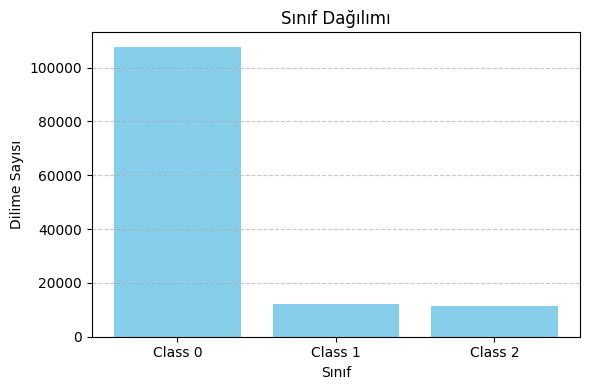

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# predictions: [array([p1, p2, p3]), array([p1, p2, p3]), ...]
# -> Sınıf indekslerini çıkar


# Her sınıfın kaç tane olduğunu say
classes, counts = np.unique(predictions, return_counts=True)

# Çiz
plt.figure(figsize=(6, 4))
plt.bar(classes, counts, tick_label=[f"Class {c}" for c in classes], color='skyblue')
plt.title("Sınıf Dağılımı")
plt.xlabel("Sınıf")
plt.ylabel("Dilime Sayısı")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


np.save("class_preds.npy", predictions)